In [ ]:
!pip install yfinance
import pandas as pd 
import yfinance as yf # import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

     |████████████████████████████████| 5.5MB 6.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=282f990b3bd742d039c73b6866272684150cf2f6c07b24fd46499bf5f820d2af
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
BTC = yf.download('BTC-USD', 
                       start='2016-01-01', 
                       end='2021-03-14',
                       progress=False)

In [ ]:
ETH = yf.download('ETH-USD', 
                       start='2016-01-01', 
                       end='2021-03-14',
                       progress=False)

In [ ]:
LTC = yf.download('LTC-USD', 
                       start='2016-01-01', 
                       end='2021-03-14',
                       progress=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  #mounting

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive/BTC'

/content/gdrive/MyDrive/BTC


In [ ]:
BTC.to_csv('BTC.csv')
ETH.to_csv('ETH.csv')
LTC.to_csv('LTC.csv')

The closing price is the raw price, which is just the cash value of the last transacted price before the market closes. The adjusted closing price factors in anything that might affect the stock price after the market closes


In [ ]:
# Extract closing prices using Adj Close price 
df = pd.DataFrame({'BTC': BTC['Adj Close'],
                   'ETH': ETH['Adj Close'],
                   'LTC': LTC['Adj Close']})
df.head()

,BTC,ETH,LTC
Date,,,
2016-01-01,434.334015,0.948024,3.50898
2016-01-02,433.437988,0.937124,3.50216
2016-01-03,430.010986,0.971905,3.48307
2016-01-04,433.091003,0.954480,3.49539
2016-01-05,431.959991,0.950176,3.46967


In [ ]:
df.describe()


,BTC,ETH,LTC
count,1855.000000,1855.000000,1855.000000
mean,6614.714563,257.683627,58.617857
std,5998.218136,262.812631,54.690534
min,364.330994,0.937124,2.996780
25%,1210.980042,48.635750,9.514820
50%,6475.740234,197.404007,48.877068
75%,9290.770020,340.118500,75.469219
max,40797.609375,1396.420044,358.335999


In [ ]:
print('Change in percentage (minimum to maximum)')
print(((BTC['Adj Close'].max() - BTC['Adj Close'].min())/BTC['Adj Close'].mean())*100,"% change in BTC ")
print(((ETH['Adj Close'].max() - ETH['Adj Close'].min())/ETH['Adj Close'].mean())*100,"% change in ETH")
print(((LTC['Adj Close'].max() - LTC['Adj Close'].min())/LTC['Adj Close'].mean())*100,"% change in LTC")

Change in percentage (minimum to maximum)
611.2626326657355 % change in BTC 
541.5489279452898 % change in ETH
606.1961949412798 % change in LTC


In [ ]:
print(BTC[BTC['Adj Close'] == BTC['Adj Close'].min()]) 
print(BTC[BTC['Adj Close'] == BTC['Adj Close'].max()]) 

print(ETH[ETH['Adj Close'] == ETH['Adj Close'].min()]) 
print(ETH[ETH['Adj Close'] == ETH['Adj Close'].max()]) 

print(LTC[LTC['Adj Close'] == LTC['Adj Close'].min()]) 
print(LTC[LTC['Adj Close'] == LTC['Adj Close'].max()]) 

                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2016-01-15  430.255005  430.255005  ...  364.330994  153351008

[1 rows x 6 columns]
                    Open          High  ...     Adj Close       Volume
Date                                    ...                           
2021-01-08  39381.765625  41946.738281  ...  40797.609375  88107519480

[1 rows x 6 columns]
                Open      High      Low     Close  Adj Close  Volume
Date                                                                
2016-01-02  0.947401  0.969637  0.93656  0.937124   0.937124  255504
                   Open         High  ...    Adj Close      Volume
Date                                  ...                         
2018-01-13  1270.469971  1432.880005  ...  1396.420044  5746760192

[1 rows x 6 columns]
               Open     High      Low    Close  Adj Close   Volume
Date                                                     

BTC


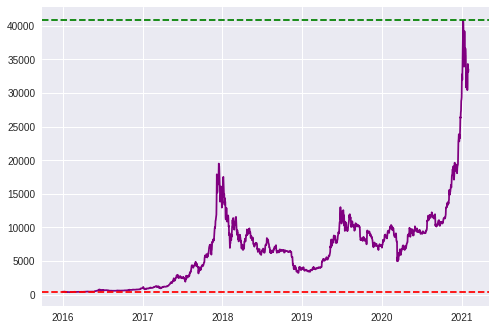

LTC


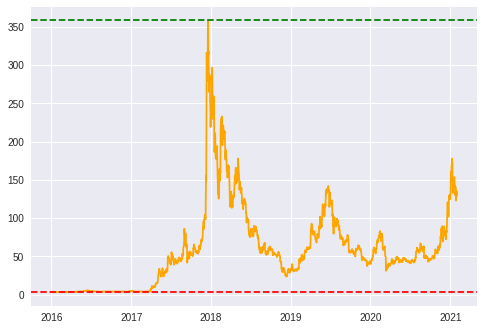

ETH


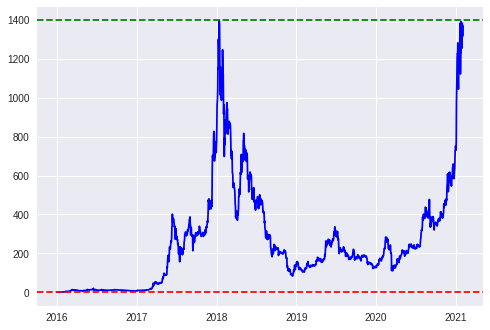

In [ ]:
print('BTC')
plt.plot(BTC['Adj Close'], color='purple')
plt.axhline(BTC['Adj Close'].max(), color='g', linestyle='--')
plt.axhline(BTC['Adj Close'].min(), color='r', linestyle='--')
plt.show()

print('LTC')
plt.plot(LTC['Adj Close'], color='orange');
plt.axhline(LTC['Adj Close'].max(), color='g', linestyle='--')
plt.axhline(LTC['Adj Close'].min(), color='r', linestyle='--')
plt.show()

print('ETH')
plt.plot(ETH['Adj Close'], color='blue');
plt.axhline(ETH['Adj Close'].max(), color='g', linestyle='--')
plt.axhline(ETH['Adj Close'].min(), color='r', linestyle='--')
plt.show()

values more than upper whisker, Detecting counts when the market went too high
For LTC


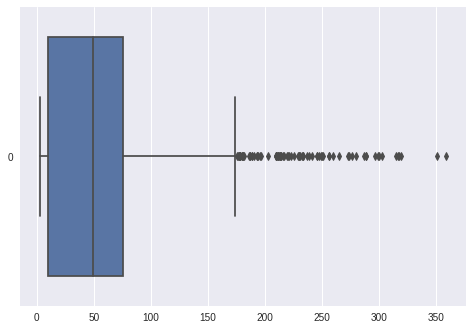

For BTC


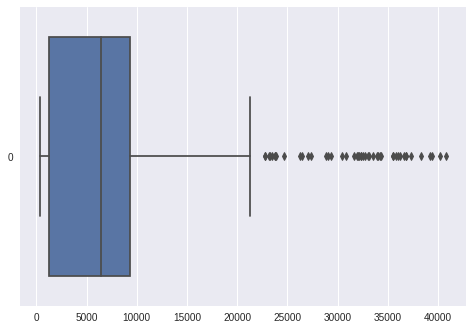

For ETH


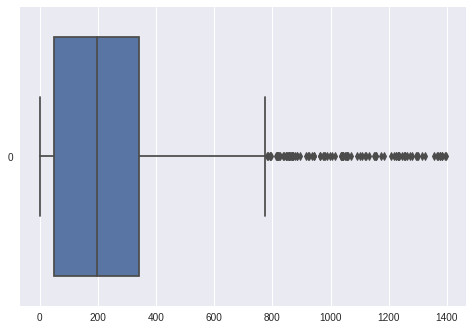

In [ ]:
import seaborn as sns
print('values more than upper whisker, Detecting counts when the market went too high')

plt.figure()
print('For LTC')
ax = sns.boxplot(data=df['LTC'], orient="h")
plt.show()
print('For BTC')
ax = sns.boxplot(data=df['BTC'], orient="h")
plt.show()
print('For ETH')
ax = sns.boxplot(data=df['ETH'], orient="h")
plt.show()


Price Movements


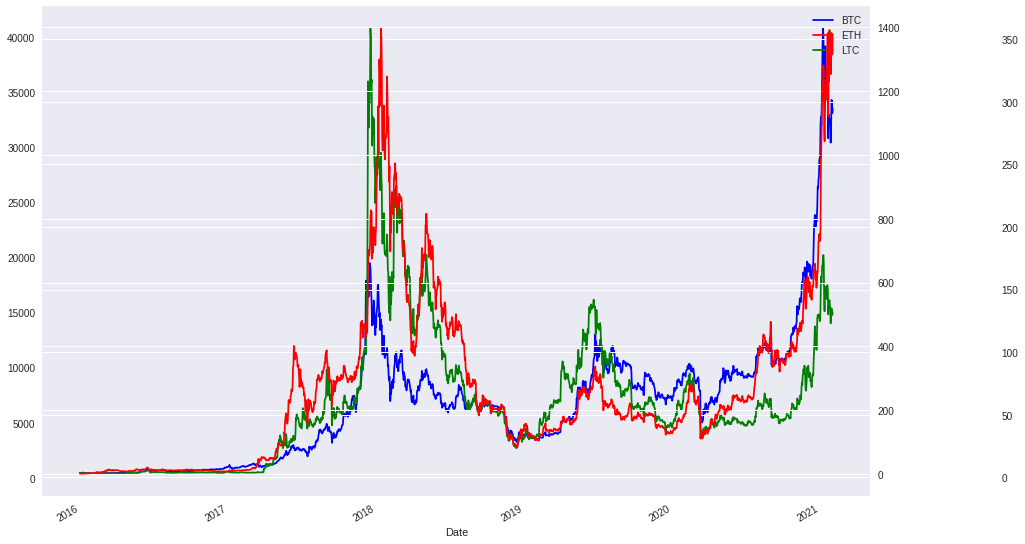

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

print('Price Movements')

Correlation Plot


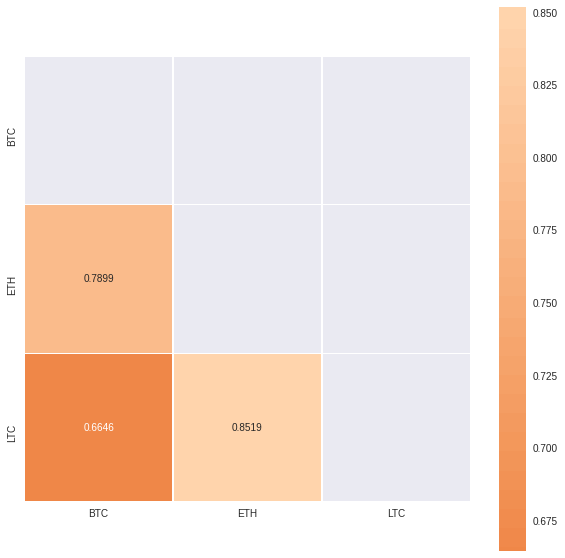

In [ ]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
print('Correlation Plot')

,BTC,ETH,LTC
Date,,,
2021-02-01,7721.517227,144409.905614,3760.407112


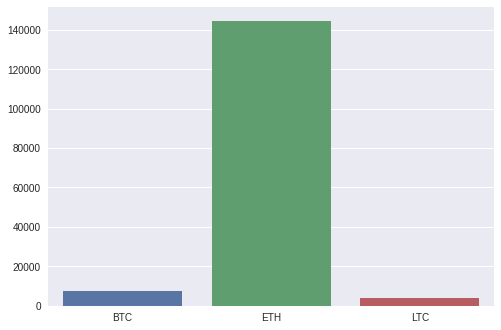

In [ ]:
 #returns using buy and hold strategy from 2016 to 2021 Feb
df_return = df.apply(lambda x: x / x[0])
#df_return.head()
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

In [ ]:
df_return

,BTC,ETH,LTC
Date,,,
2016-01-01,1.000000,1.000000,1.000000
2016-01-02,0.997937,0.988502,0.998056
2016-01-03,0.990047,1.025190,0.992616
2016-01-04,0.997138,1.006810,0.996127
2016-01-05,0.994534,1.002270,0.988797
...,...,...,...
2021-01-28,72.869277,1369.271074,37.216420
2021-01-29,79.009208,1458.320532,38.476301
2021-01-30,78.901312,1451.561896,38.016752


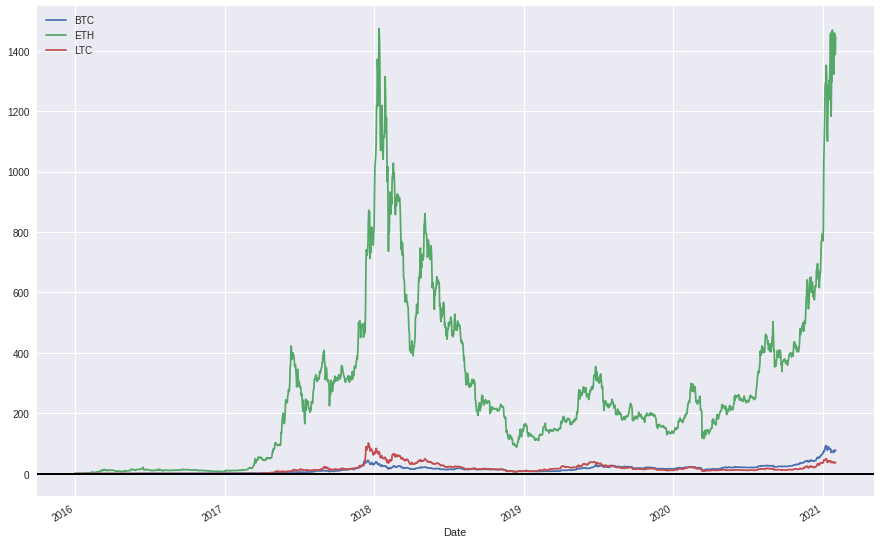

In [ ]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

,BTC,ETH,LTC
Date,,,
2016-01-01,0.230238,105.482564,28.49831


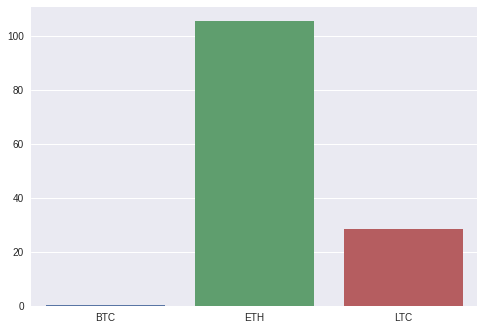

In [ ]:
### How many coins could we bought for $100?

budget = 100 # USD
df_coins = budget/df.head(1)
ax = sns.barplot(data=df_coins)
df_coins

In [ ]:
current_price=(df['ETH'][-1]*105.482564)
current_price

144409.90504413086

In [ ]:
print('100 USD invested on 1st Jan 2016 and the current price now will be', current_price, 'USD')

100 USD invested on 1st Jan 2016 and the current price now will be 144409.90504413086 USD


In [ ]:
BTC['daily_return'] = BTC['Adj Close'].pct_change()
ETH['daily_return'] = ETH['Adj Close'].pct_change()
LTC['daily_return'] = LTC['Adj Close'].pct_change()

In [ ]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,NaN
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.002063
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.007907
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.007163
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.002611


Price Change


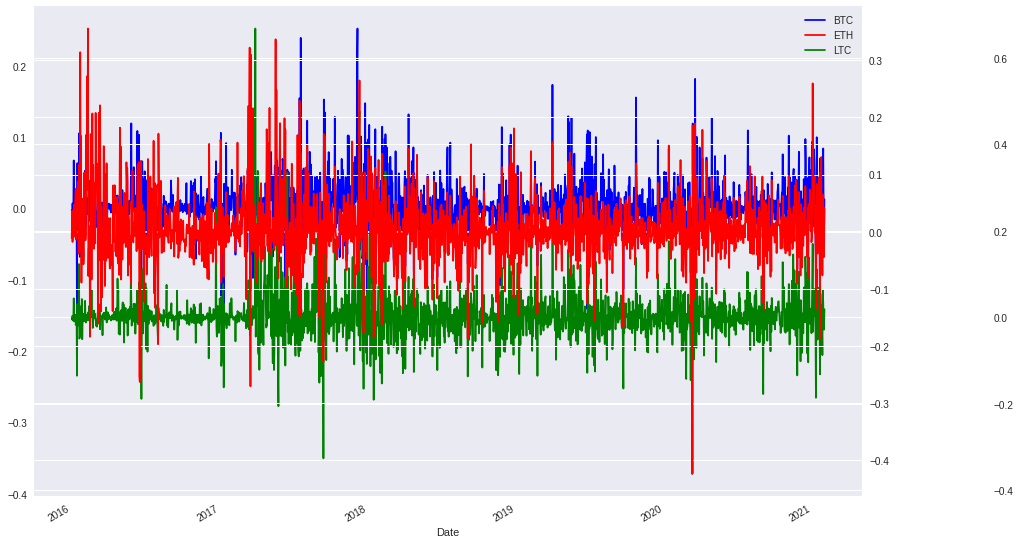

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

BTC['daily_return'].plot(ax=ax1, style='b-')
ETH['daily_return'].plot(ax=ax1, style='r-', secondary_y=True)
LTC['daily_return'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

print('Price Change')

In [ ]:
BTC.dropna(inplace=True)
ETH.dropna(inplace=True)
LTC.dropna(inplace=True)


In [ ]:
BTC

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.002063
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.007907
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.007163
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.002611
2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500,-0.006609
...,...,...,...,...,...,...,...
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,0.030927
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,0.010250
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,0.054034


In [ ]:
BTC['Day_Perc_Change'] = BTC['daily_return']*100

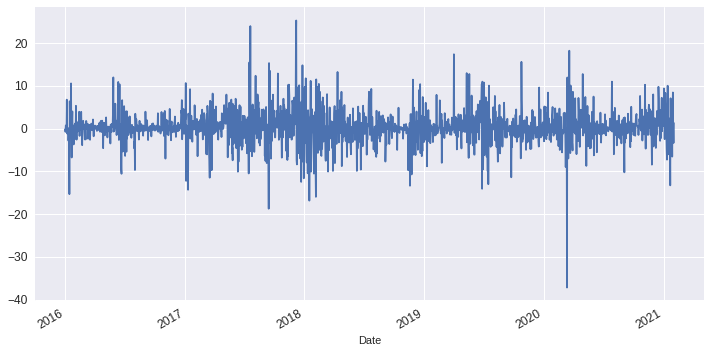

In [ ]:
BTC['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

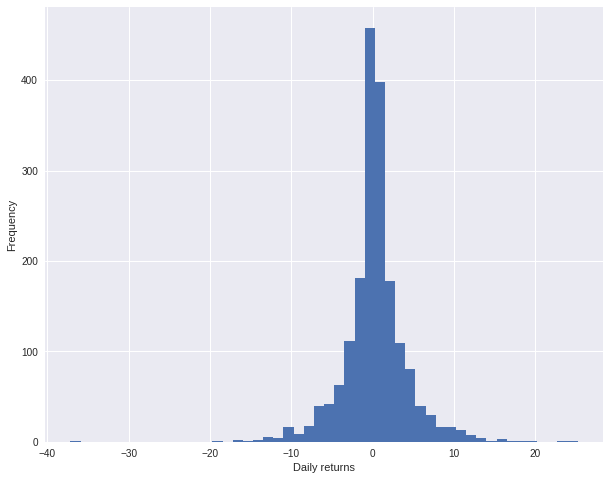

count    1854.000000
mean        0.313480
std         3.949184
min       -37.169539
25%        -1.141259
50%         0.220197
75%         1.781683
max        25.247169
Name: Day_Perc_Change, dtype: float64

In [ ]:
BTC['Day_Perc_Change'].hist(bins = 50, figsize = (10,8)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
BTC.Day_Perc_Change.describe()

The daily returns histogram is centered about origin. For the past 5 years, the mean daily returns has been about 0.31 and for most of the days BTC has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 25+ % and was 35+ % in negative direction.

In [ ]:
# Trend checker

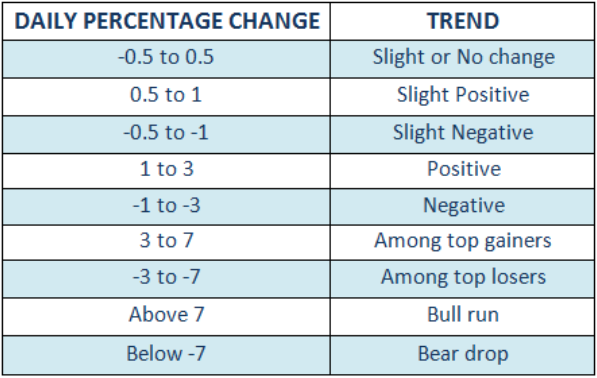

In [ ]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
BTC['Trend']= np.zeros(BTC['Day_Perc_Change'].count())
BTC['Trend']= BTC['Day_Perc_Change'].apply(lambda x:trend(x))
BTC.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,Day_Perc_Change,Trend
Date,,,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.002063,-0.206299,Slight or No change
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.007907,-0.790656,Slight Negative
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.007163,0.716265,Slight Positive
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.002611,-0.261149,Slight or No change
2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500,-0.006609,-0.660936,Slight Negative


Visualizing Trend Frequency with Pie-Chart —


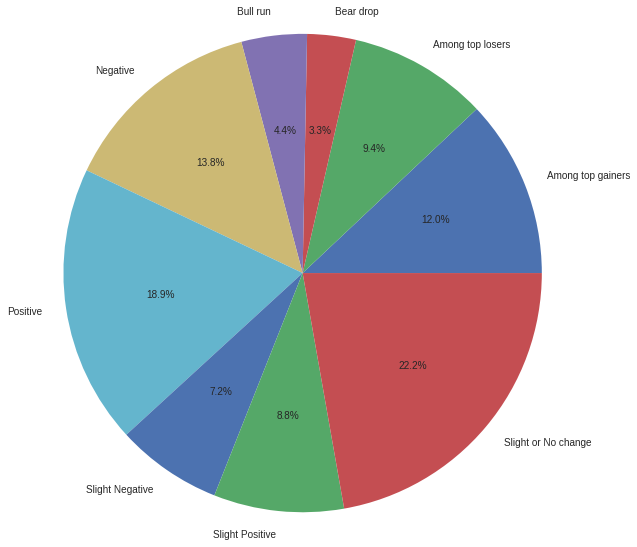

In [ ]:
BTC_pie_data = BTC.groupby('Trend')
pie_label = sorted([i for i in BTC.loc[:, 'Trend'].unique()])
plt.pie(BTC_pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

In [ ]:
#Daily Returns and Volume

In [ ]:
BTC

,Open,High,Low,Close,Adj Close,Volume,daily_return,Day_Perc_Change,Trend
Date,,,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.002063,-0.206299,Slight or No change
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.007907,-0.790656,Slight Negative
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.007163,0.716265,Slight Positive
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.002611,-0.261149,Slight or No change
2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500,-0.006609,-0.660936,Slight Negative
...,...,...,...,...,...,...,...,...,...
2021-01-28,30441.041016,31891.300781,30023.207031,31649.605469,31649.605469,78948162368,0.039992,3.999201,Among top gainers
2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,117894572511,0.084260,8.425954,Bull run
2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,65141828798,-0.001366,-0.136562,Slight or No change


In [ ]:
!pip install monthly-returns-heatmap
import monthly_returns_heatmap as mrh


  Created wheel for monthly-returns-heatmap: filename=monthly_returns_heatmap-0.0.11-cp37-none-any.whl size=8102 sha256=870a4984e2cedae9e13a2affc5a331f83c9d24fe0930b22dc753ffe9a5f89205
  Stored in directory: /root/.cache/pip/wheels/98/e6/a6/5e8e316bb2ddc8bf692b75d63c5db9208d82aaecacb1e1ff72
Successfully built monthly-returns-heatmap


In [ ]:
a=368.766998
b=437.696991

In [ ]:

d=416.729004

In [ ]:
c=((b-a)/a)*100

In [ ]:
c

18.692017825304426

In [ ]:
BTC.head(90)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...
2016-03-26,417.364990,418.987000,416.259003,417.945007,417.945007,44650400
2016-03-27,418.140015,428.796997,417.710999,426.765015,426.765015,71229400
2016-03-28,426.548004,426.856995,423.292999,424.230988,424.230988,68522800


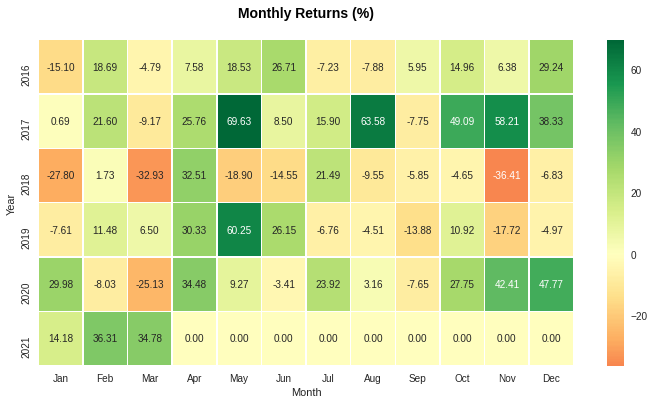

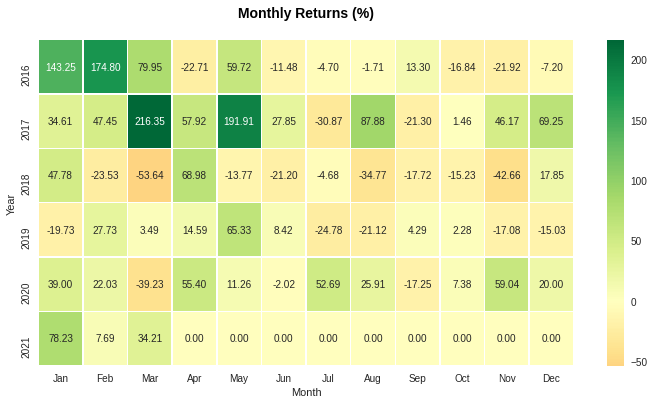

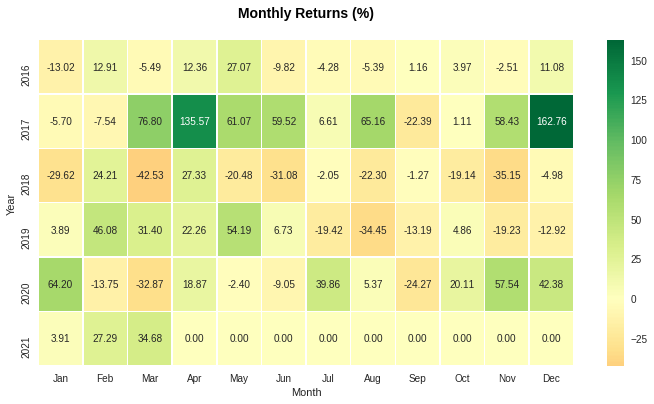

In [ ]:
mrh.plot( BTC['daily_return'],figsize = (12, 6))
plt.show()

mrh.plot( ETH['daily_return'],figsize = (12, 6))
plt.show()

mrh.plot( LTC['daily_return'],figsize = (12, 6))
plt.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

In [ ]:
BTC.head(1)

,Open,High,Low,Close,Adj Close,Volume,daily_return,Day_Perc_Change,Trend
Date,,,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.002063,-0.206299,Slight or No change


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=BTC.index,
                open=BTC['Open'],
                high=BTC['High'],
                low=BTC['Low'],
                close=BTC['Close'])])

fig.show()

In [ ]:
!pip install mpl-finance

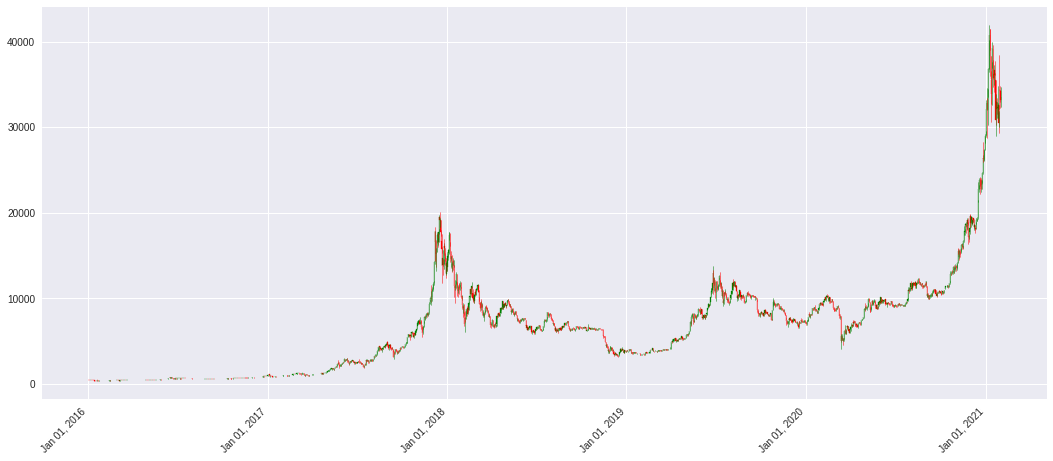

In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.dates import date2num


from mpl_finance import candlestick_ohlc

#from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots(figsize=(18,8))
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "green", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()
 
pandas_candlestick_ohlc(BTC)

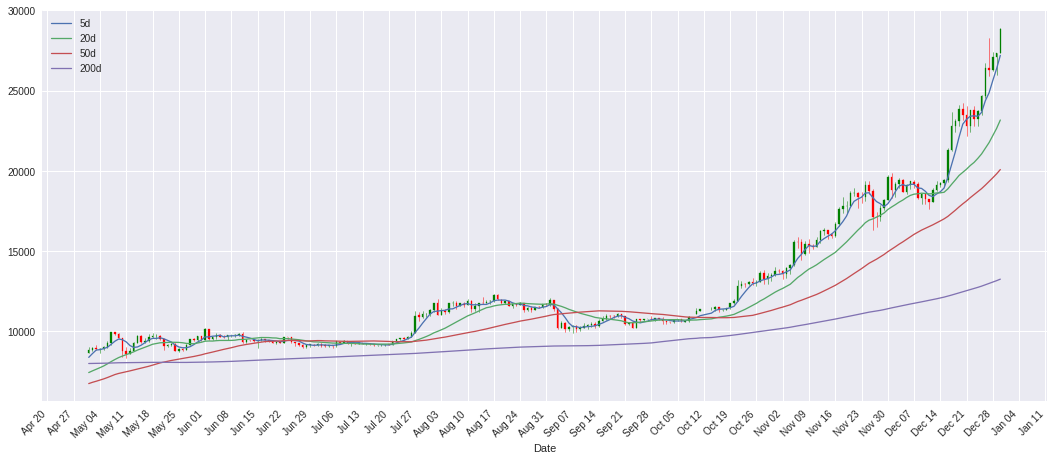

In [ ]:
BTC["5d"] = np.round(BTC["Close"].rolling(window = 5, center = False).mean(), 2)
BTC["20d"] = np.round(BTC["Close"].rolling(window = 20, center = False).mean(), 2)
BTC["50d"] = np.round(BTC["Close"].rolling(window = 50, center = False).mean(), 2)
BTC["200d"] = np.round(BTC["Close"].rolling(window = 200, center = False).mean(), 2)

pandas_candlestick_ohlc(BTC.loc['2020-05-01':'2020-12-30',:], otherseries = ["5d","20d", "50d", "200d"])

In [ ]:
BTC.head(1)

,Open,High,Low,Close,Adj Close,Volume,daily_return,Day_Perc_Change,Trend,20d,50d,200d,5d
Date,,,,,,,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.002063,-0.206299,Slight or No change,NaN,NaN,NaN,NaN


In [ ]:
BTC['daily_return'][:365+365]

Date
2016-01-02   -0.002063
2016-01-03   -0.007907
2016-01-04    0.007163
2016-01-05   -0.002611
2016-01-06   -0.006609
                ...   
2017-12-27   -0.016230
2017-12-28   -0.077785
2017-12-29    0.003403
2017-12-30   -0.116265
2017-12-31    0.092973
Name: daily_return, Length: 730, dtype: float64

Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. A ratio higher than 2.0 is rated as very good. A ratio of 3.0 or higher is considered excellent. A ratio under 1.0 is considered sub-optimal.

In [ ]:
SharpeRatio_2016=(BTC['daily_return']['20160101':'20170101'].mean()/BTC['daily_return']['20160101':'20170101'].std()) * (365**0.5)
SharpeRatio_2017=(BTC['daily_return']['20170101':'20180101'].mean()/BTC['daily_return']['20170101':'20180101'].std()) * (365**0.5)
SharpeRatio_2018=(BTC['daily_return']['20180101':'20190101'].mean()/BTC['daily_return']['20180101':'20190101'].std()) * (365**0.5)
SharpeRatio_2019=(BTC['daily_return']['20190101':'20200101'].mean()/BTC['daily_return']['20190101':'20200101'].std()) * (365**0.5)
SharpeRatio_2020=(BTC['daily_return']['20200101':'20210101'].mean()/BTC['daily_return']['20200101':'20210101'].std()) * (365**0.5)


In [ ]:
print('SharpeRatio_2016:',SharpeRatio_2016)
print('SharpeRatio_2017:',SharpeRatio_2017)
print('SharpeRatio_2018:',SharpeRatio_2018)
print('SharpeRatio_2019:',SharpeRatio_2019)
print('SharpeRatio_2020:',SharpeRatio_2020)

SharpeRatio_2016: 1.9677223944529043
SharpeRatio_2017: 3.251242600845886
SharpeRatio_2018: -1.1931963397640193
SharpeRatio_2019: 1.2959898074641394
SharpeRatio_2020: 2.3486399209533633


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



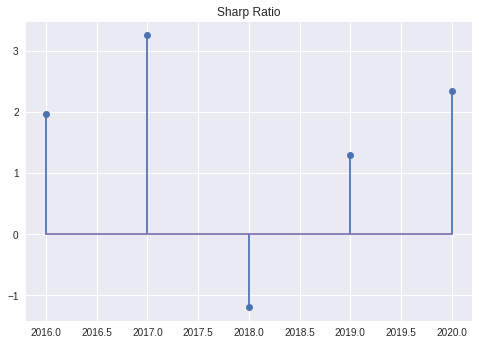

In [ ]:
y = [SharpeRatio_2016,SharpeRatio_2017,SharpeRatio_2018,SharpeRatio_2019,SharpeRatio_2020]
x = [2016,2017,2018,2019,2020]

plt.stem(x, y)
plt.title('Sharp Ratio')
plt.show()


In [ ]:
KIRLOSENG = yf.download('KIRLOSENG.NS', 
                       start='2011-01-01', 
                       end='2021-03-01',
                       progress=False)

In [ ]:
DELTACORP = yf.download('DELTACORP.NS', 
                       start='2011-01-01', 
                       end='2021-03-01',
                       progress=False)

In [ ]:
HIMADRI = yf.download('HSCL.NS', 
                       start='2011-01-01', 
                       end='2021-03-01',
                       progress=False)

In [ ]:
KIRLOSENG.dropna(inplace=True)

In [ ]:
DELTACORP.dropna(inplace=True)

In [ ]:
HIMADRI.dropna(inplace=True)

In [ ]:
KIRLOSENG['daily_return'] = KIRLOSENG['Adj Close'].pct_change()

In [ ]:
DELTACORP['daily_return'] = DELTACORP['Adj Close'].pct_change()

In [ ]:
HIMADRI['daily_return'] = HIMADRI['Adj Close'].pct_change()

In [ ]:
KIRLOSENG.dropna(inplace=True)

In [ ]:
DELTACORP.dropna(inplace=True)

In [ ]:
HIMADRI.dropna(inplace=True)

In [ ]:
!pip install monthly-returns-heatmap
import monthly_returns_heatmap as mrh


  Created wheel for monthly-returns-heatmap: filename=monthly_returns_heatmap-0.0.11-cp37-none-any.whl size=8102 sha256=66ef0111e19fbf03a0a9f7843b4c032a6879f076dd7d6b5253c042790f0c3d83
  Stored in directory: /root/.cache/pip/wheels/98/e6/a6/5e8e316bb2ddc8bf692b75d63c5db9208d82aaecacb1e1ff72
Successfully built monthly-returns-heatmap


In [ ]:
KIRLOSENG

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2011-01-04,221.100006,224.000000,218.149994,220.949997,172.741425,12033,-0.004730
2011-01-05,215.000000,232.000000,215.000000,230.750000,180.403152,17351,0.044354
2011-01-06,222.050003,228.449997,220.350006,227.250000,177.666855,33637,-0.015168
2011-01-07,221.000000,232.000000,221.000000,225.050003,175.946869,46351,-0.009681
2011-01-10,225.050003,242.000000,221.000000,234.149994,183.061371,20566,0.040436
...,...,...,...,...,...,...,...
2021-02-22,160.100006,161.850006,151.300003,155.149994,155.149994,260971,-0.030918
2021-02-23,155.149994,163.100006,155.149994,161.100006,161.100006,211538,0.038350
2021-02-24,161.850006,163.000000,157.899994,158.399994,158.399994,77418,-0.016760


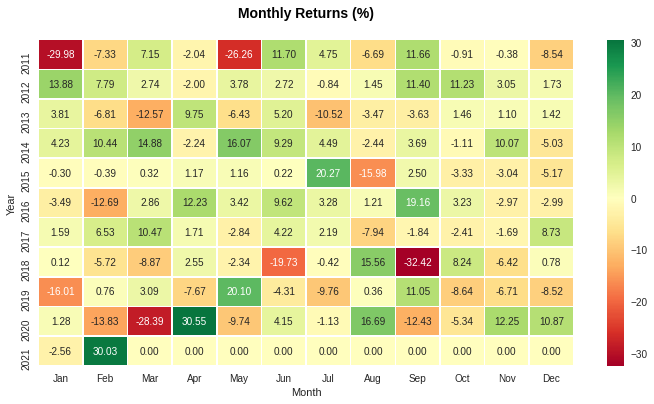

In [ ]:
mrh.plot( KIRLOSENG['daily_return'],figsize = (12, 6))
plt.show()

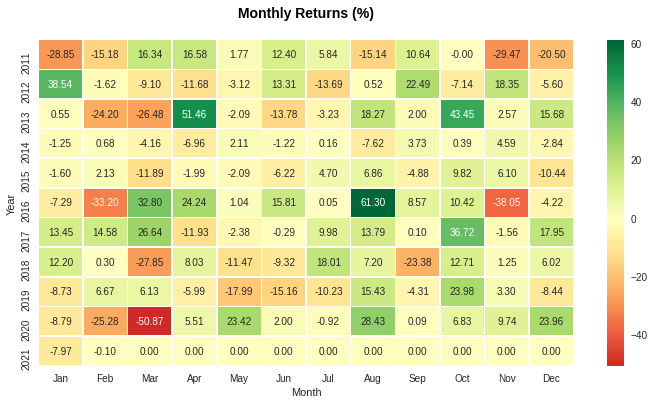

In [ ]:
mrh.plot( DELTACORP['daily_return'],figsize = (12, 6))
plt.show()

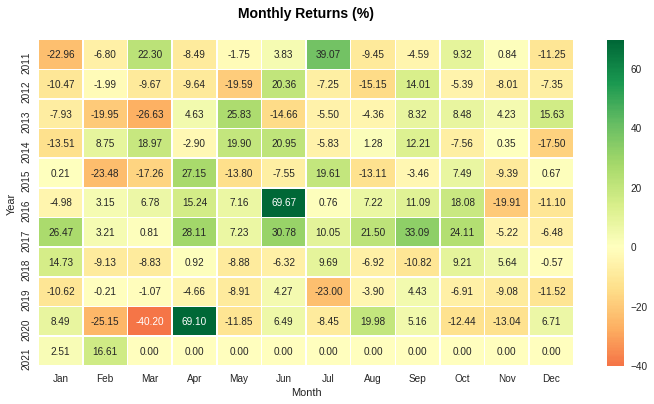

In [ ]:
mrh.plot( HIMADRI['daily_return'],figsize = (12, 6))
plt.show()

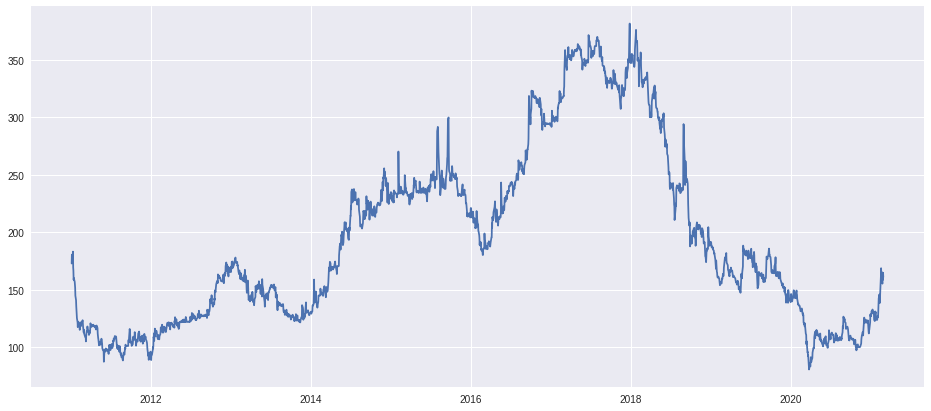

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(KIRLOSENG['Adj Close'])
plt.show()

In [ ]:
KIRLOSENG['Adj Close'].mean()

194.04779899291992

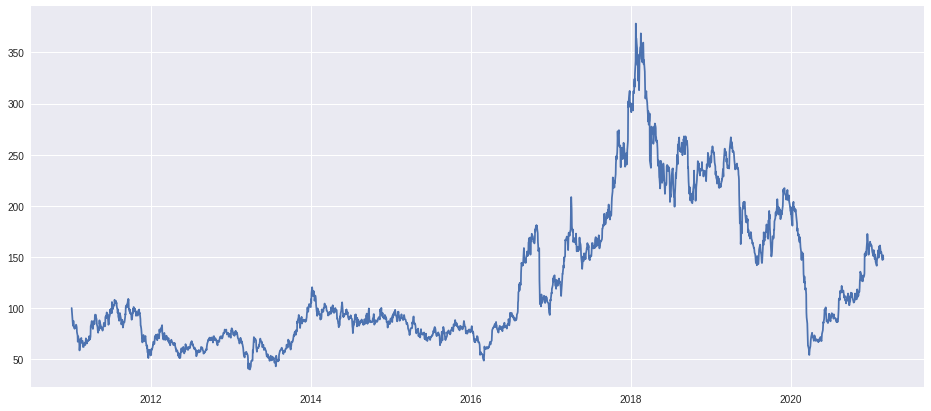

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(DELTACORP['Adj Close'])
plt.show()

In [ ]:
DELTACORP['Adj Close'][1250:].mean()

172.0262738220215

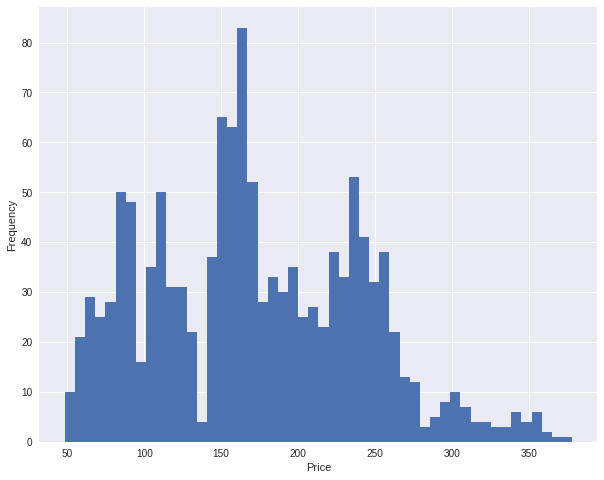

count    1250.000000
mean      172.026274
std        68.359812
min        48.338985
25%       114.462500
50%       165.532112
75%       226.058208
max       378.249084
Name: Adj Close, dtype: float64

In [ ]:
DELTACORP['Adj Close'][1250:].hist(bins = 50, figsize = (10,8)) 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#satistics
DELTACORP['Adj Close'][1250:].describe()

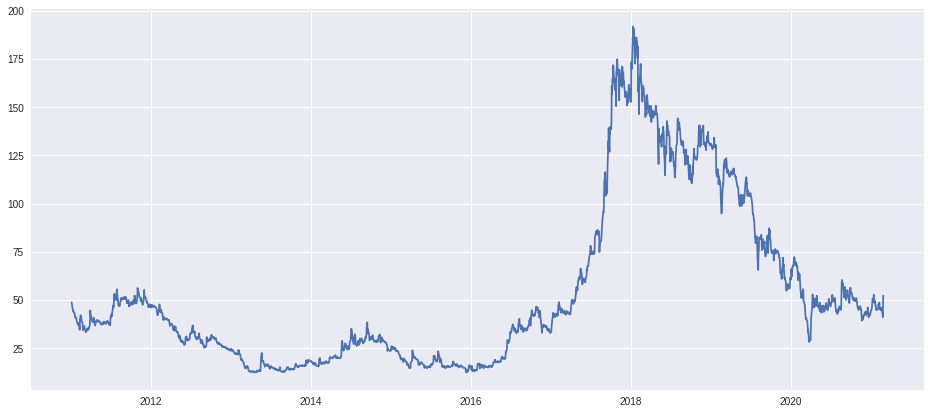

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(HIMADRI['Adj Close'])
plt.show()

In [ ]:
HIMADRI['Adj Close'][1250:].mean()

80.06154237670899

In [ ]:
HIMADRI['Adj Close'].mean()

53.439316353988644

In [ ]:
KIRLOSENG = yf.download('KIRLOSENG.NS', 
                       start='2016-01-01', 
                       end='2021-03-03',
                       progress=False)
KIRLOSENG.dropna(inplace=True)
HIMADRI['Adj Close'].mean()
HIMADRI['Adj Close'][-1]